In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from skimage.io import imread
from collections import Counter
from string import punctuation

In [4]:
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize

<p style="text-align: center; color: maroon; font-size: 19px" > Analysis of James Joyce's book "Finnegans Wake"

<p style="text-align: center; color: maroon; font-size: 17px" > by Irina Nedyalkova

With this work I show respect and my own curiosity to the vividness and determination of the personality of Mr. James Joyce. The book "Finnegans Wake" has been written in 17 years. It has seventeen chapters, divided into four parts:
- Part I contains eight chapters;
- Parts II contains four chapters;
- Part III also four chapters;
- Part IV only one short chapter.

The book forms a cycle: the last sentence recirculates to the first sentence. It is a $360^{\circ}$ story.

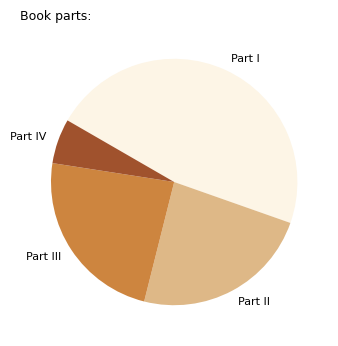

In [5]:
plt.figure(figsize = (4, 4))

values = [8, 4, 4, 1]
colors = ["oldlace", "burlywood", "peru", "sienna"]

names = "Part I", "Part II", "Part III", "Part IV"
fontsize = {"fontsize": 8}

plt.pie(values, labels = names, colors = colors, textprops = fontsize, counterclock = False, startangle = 150)
plt.title("Book parts:", size = "9", loc = "left")

plt.show()

"A way a lone a last a loved a long the... ...riverrun, past Eve and Adamâ€™s, from swerve of shore to bend of bay, brings us by a commodius vicus of recirculation back to Howth Castle and Environs." Come on, Mr. Joyce, tell me the secret of your joyous writings...

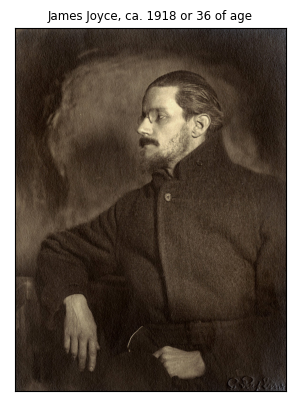

In [6]:
he = imread("joyce.jpg")
plt.figure(figsize = (3.5, 6.5))
plt.xticks([])
plt.yticks([])
plt.title("James Joyce, ca. 1918 or 36 of age", size = 8.5)
plt.imshow(he)
plt.show()

To be fluid with the concept of the book, I start analyzing from Part IV:

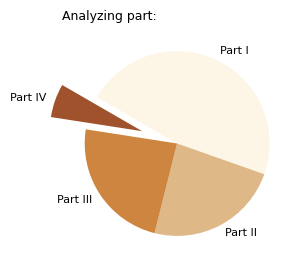

In [7]:
plt.figure(figsize = (3, 3))
values = [8, 4, 4, 1]
colors = ["oldlace", "burlywood", "peru", "sienna"]

explode = (0, 0, 0, 0.4)      # mark the part we want > 0

names = "Part I", "Part II", "Part III", "Part IV"
fontsize = {"fontsize": 8}
plt.pie(values, labels = names, colors = colors, textprops = fontsize,
        explode = explode, counterclock = False, startangle = 150)
plt.title("Analyzing part:", size = "9", loc = "left") 

plt.show()

- I copied the words from a .pdf to a .docs file
- than I did data cleaning, manually, to experience the story and what it feels like to clean data
- Part IV has its moving melody and the very last sentences are deeply affecting

In [8]:
CORPUS_part4 = open("fw_last_chapter.docx", "r").read()

In [9]:
#CORPUS_part4              # Large data stays closed for GitHub

When analyzing data, I like to have it open. It is like... data speak to me. We have a connection. Later, I could close the variable but when I work, I prefer to have it open. The library "nltk" is a Natural Language ToolKit working with human language data. It is time to dip my toe with a sentence or two. 

In [10]:
sentence1 = "Come, hours, be ours! But still."

word_tokenize(sentence1)

['Come', ',', 'hours', ',', 'be', 'ours', '!', 'But', 'still', '.']

In [11]:
Counter(word_tokenize(sentence1))                # apply on tiny pieces first

Counter({'Come': 1,
         ',': 2,
         'hours': 1,
         'be': 1,
         'ours': 1,
         '!': 1,
         'But': 1,
         'still': 1,
         '.': 1})

Has to decide what to do with the punctuation signs... In most cases, they are removed.

In [12]:
words_in_sentence1 = word_tokenize(sentence1)

In [13]:
words_in_sentence1[1]

','

In [14]:
words_in_sentence1[6]

'!'

In [15]:
words_in_sentence1[9]

'.'

As in math, so in literature, we break the whole into parts to look closer and to make something difficult more easy to understand.

In [16]:
nltk.pos_tag(words_in_sentence1)

[('Come', 'NNP'),
 (',', ','),
 ('hours', 'NNS'),
 (',', ','),
 ('be', 'VB'),
 ('ours', 'VBN'),
 ('!', '.'),
 ('But', 'CC'),
 ('still', 'RB'),
 ('.', '.')]

You see, there are really codes here, and we better have some language skills to properly analyze text:
- pos_tag (Part of Speech tagging) helps identifying the correct meaning of the word based on the context;
- pos_tag provides valuable information about the relationship between words;
- important in understanding the structure and meaning of text.

In [17]:
nltk_codes = pd.DataFrame({"parts in sentence": ["Proper noun, singular phrase", "Noun, plural", "Verb",
                                                   "Verb, past participle", "Coordinating conjunction", "Adverb"],
                               "nltk parts tag": ["NNP", "NNS", "VB", "VBN", "CC", "RB"]})

In [18]:
nltk_codes.style.hide()

No need to have all the tags in mind, we build our own search function:

In [19]:
def tag(word):
    return pos_tag(word_tokenize(word))

In [20]:
tag("be")

[('be', 'VB')]

In [21]:
tag("hours")

[('hours', 'NNS')]

There are many ways to look closer and closer and closer into a text. Below, we use the tags to find parts of the speech:

In [22]:
is_verb = lambda pos: pos[:3] == "VB"
is_noun = lambda pos: pos[:3] == "NNS"
is_conj = lambda pos: pos[:3] == "CC"

In [23]:
[word for (word, pos) in nltk.pos_tag(words_in_sentence1) if is_verb(pos)]       # a verb indicates an action

['be']

In [24]:
[word for (word, pos) in nltk.pos_tag(words_in_sentence1) if is_noun(pos)]      # a sentence contains at least one noun !

['hours']

In [25]:
[word for (word, pos) in nltk.pos_tag(words_in_sentence1) if is_conj(pos)]     # a coordinating conjunction connects

['But']

Better we use lambda's rarely for a quick one-liner, something we need to know now but probably do not need in the future.

> "a word is characterized by the company it keeps", J. R. Firth, a leading figure in British linguistics during the 1950s

Each language can be described in terms of a distributional structure, how a part (element) relates to other parts, and
how this structure is complete without interrupting the meaning. The distribution of an element is understood as the sum of all its environments and the environment is an existing array of its co-occurrents (occurring together, at the same time with the other elements), each in a particular position. All elements in a language are grouped into classes whose
relative occurrence can be stated exactly. At that point, for the occurrence of a particular member of one class relative to a particular member of another class, it would be necessary to speak in terms of probability, based on the frequency of
that occurrence in a sample.

It has been thought that one could only state the normative rules of grammar or the rules for a standard dialect but not for "substandard" speech or slang. However, in all dialect studies it has been possible to find elements having regularities of occurrence. Does structure really exist in the language? Yes, it does! As much as any scientific structure really exists in the data it describes. The scientific structure states a network of relations and lines of distributional structure can be found in experimental work, indeed. Have in mind that different styles differ in details (distributional perception).

This book is written mostly with unique words and expressions. Part $IV$ has 5550 of them:

In [26]:
len(Counter(word_tokenize(CORPUS_part4)))                    # unique expressions

5550

All words and signs of Part $IV$ are 15759:

In [27]:
len(nltk.word_tokenize(CORPUS_part4))            # length of Part IV

15759

In [28]:
len(Counter(word_tokenize(CORPUS_part4))) / len(nltk.word_tokenize(CORPUS_part4))

0.35217970683419

> Unique expressions in Part IV of "Finnegans Wake" are 35%

I transform the dictionary in DataFrame for more clarity:

In [29]:
char_appear = Counter(word_tokenize(CORPUS_part4))

In [30]:
df_char = pd.DataFrame.from_dict(char_appear, orient = "index", columns = ["count"])

In [31]:
df_expressions = df_char.reset_index()         # df means DataFrame

In [32]:
df_unique_expressions = df_expressions.rename(columns = {"index": "expression"})

There are 292 exclamation signs:

In [33]:
df_unique_expressions[df_unique_expressions["expression"] == "!"]

expression  count
1          !    292

There are 899 full stops:

In [34]:
df_unique_expressions[df_unique_expressions["expression"] == "."]

expression  count
5          .    899

There are 1046 commas:

In [35]:
df_unique_expressions[df_unique_expressions["expression"] == ","]

expression  count
17          ,   1046

And 89 question marks:

In [36]:
df_unique_expressions[df_unique_expressions["expression"] == "?"]

expression  count
72          ?     89

I take them out, so we have just words in here:

In [37]:
df_unique_words = df_unique_expressions.drop(index = [1, 5, 15, 72])

In [38]:
df_words_used_once = df_unique_words[df_unique_words["count"] == 1]                             # df is DataFrame

> Words, used just once: 4738

This is the magic of Finnegans Wake! It is written mostly in unique words.

In [39]:
df_words_used_once.sort_values("expression").head(8)

expression  count
1207       -Thay      1
4235        22.5      1
2724          39      1
4233        4.32      1
1358         600      1
4234           8      1
2961  Abbeytotte      1
3953       About      1

Oh, hello! There are also numbers present!

<p style = "font-size: 15px; text-align: left; color: gray" > (work in progress, will continue asap)

Given! We always go back to where it all began. $- - - >$ (the last sentence of the project)

______________________________________________________________________________________________________________________________

References:
1. Distributional Structure by ZS Harris, 1954